In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper

import statsmodels.formula.api as smf
from math import sqrt
from sklearn import metrics

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Loading the data

In [4]:
g_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Project\\Gold_data.csv")

In [5]:
g_df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [6]:
g_df.set_index('date',inplace=True)

In [7]:
# Diving data into 80:20 ratio

train=g_df.iloc[0:1745]
test=g_df.iloc[1745:]

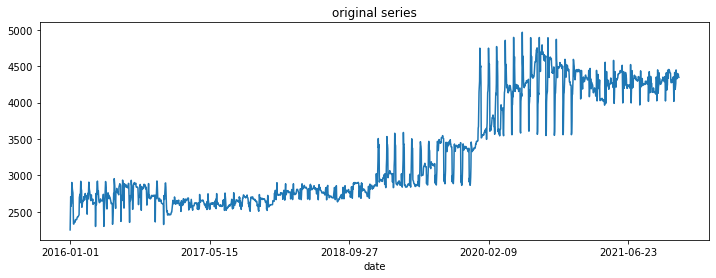

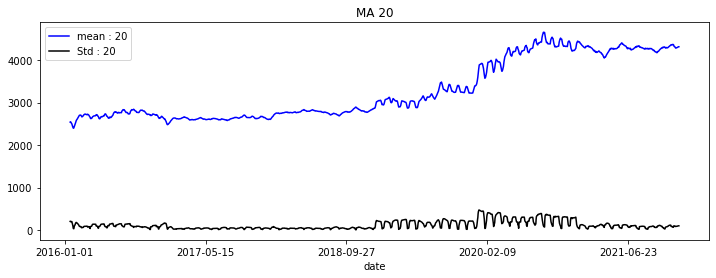

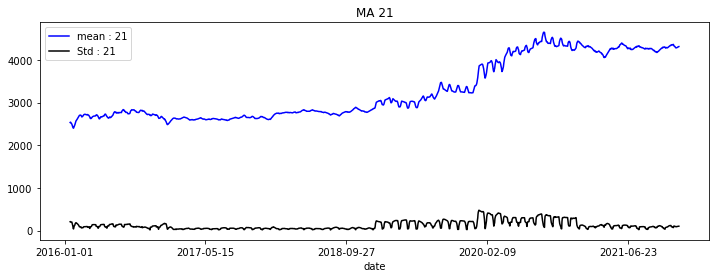

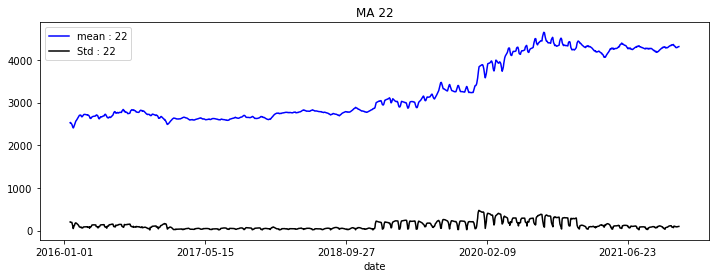

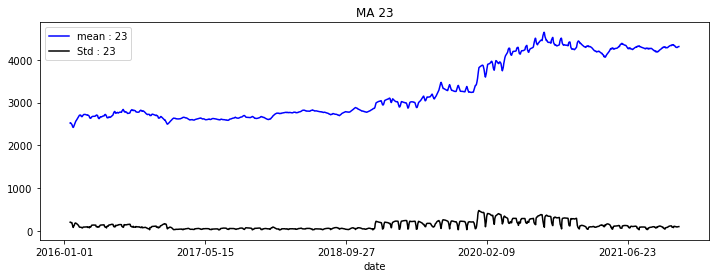

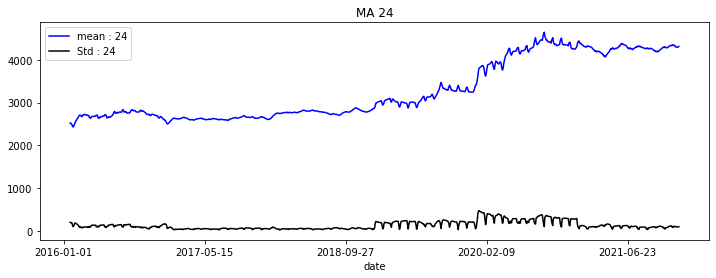

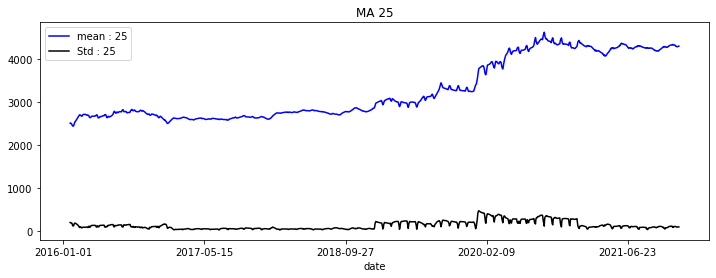

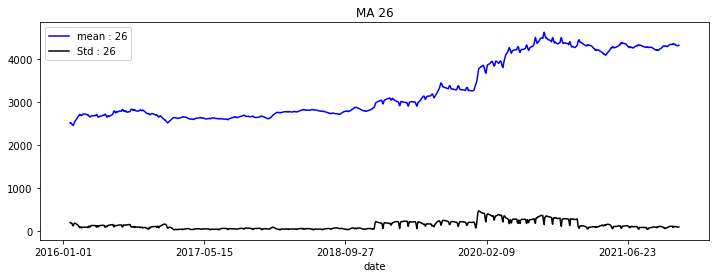

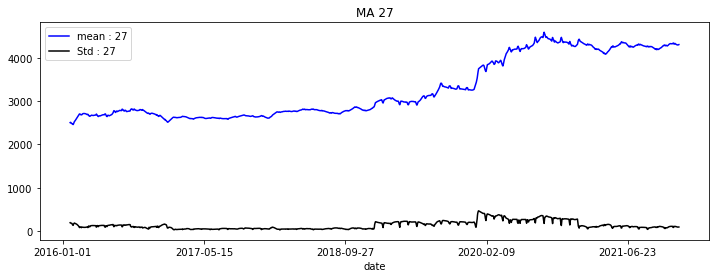

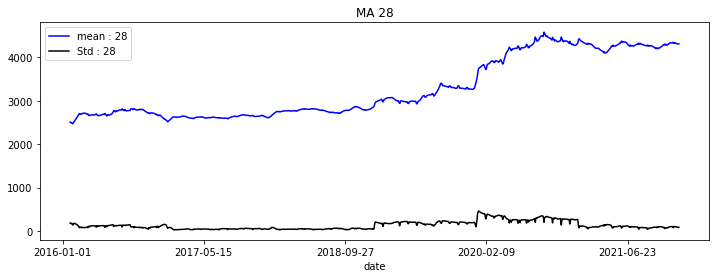

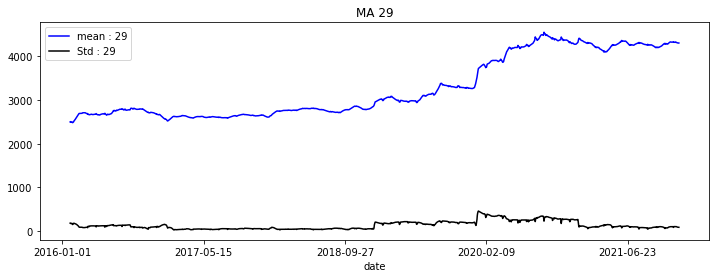

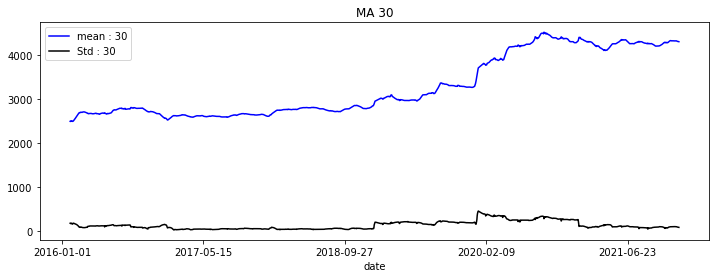

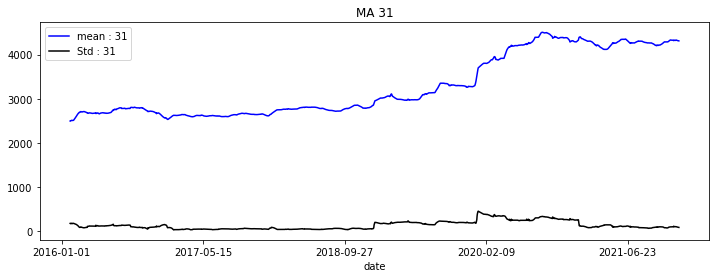

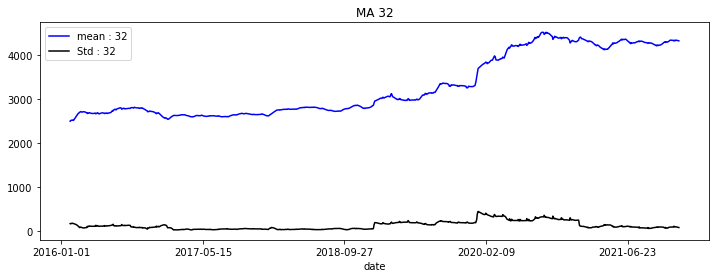

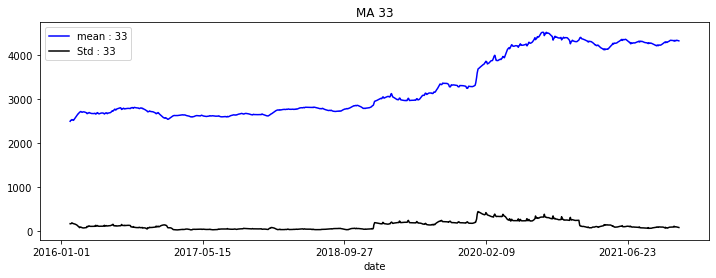

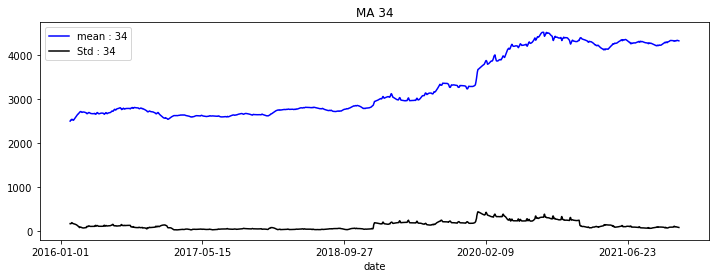

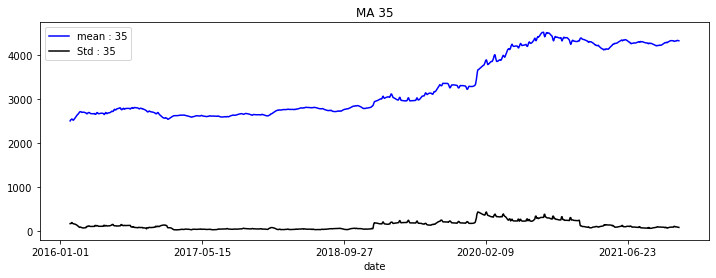

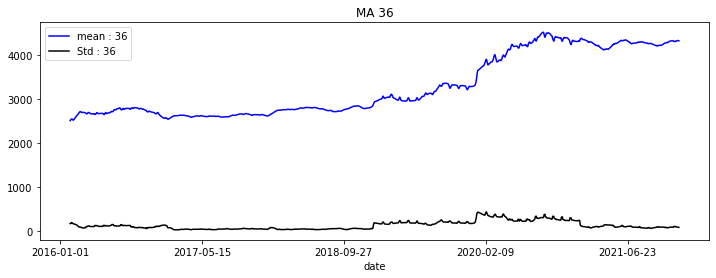

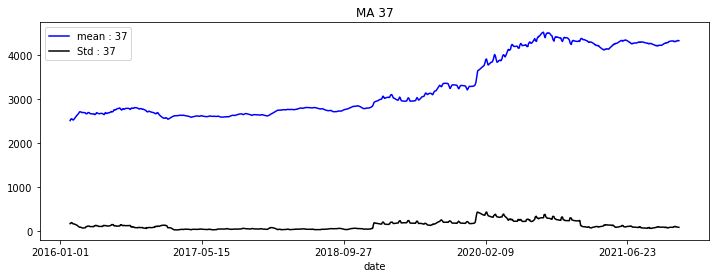

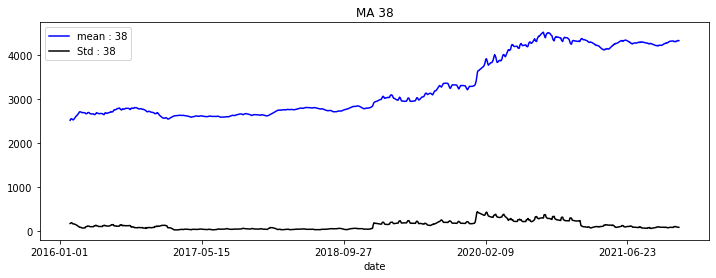

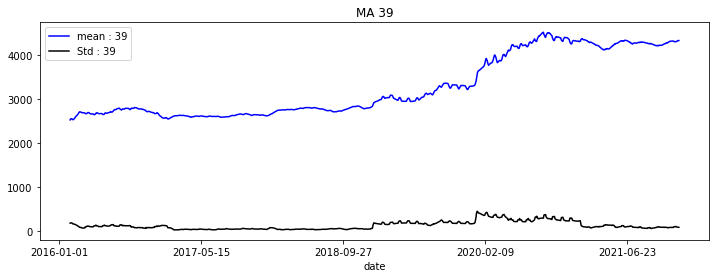

In [8]:
# to find the Window size or frequency :

plt.figure(figsize=(12,4))
g_df.price.plot(label="price")
plt.title("original series")

for i in range(20,40):
    plt.figure(figsize=(12,4))


    g_df["price"].rolling(i).mean().plot(label="mean : "+str(i),color='blue')
    g_df["price"].rolling(i).std().plot(label="Std : "+str(i),color='black')
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

- Rolling mean is showing some trend in all the cases.
- Standard deviation is also not constant.
- we can say that the data is not stationary.

# Transformations :

In [9]:
g_df["diff_1"] = g_df['price'].diff(periods=1)

In [10]:
adf = adfuller(g_df['diff_1'].dropna())
adfoutput = pd.Series(adf[0:3], index=['Test Statistic','p-value','#Lags Used'])
print(adfoutput)

Test Statistic   -21.664542
p-value            0.000000
#Lags Used        26.000000
dtype: float64


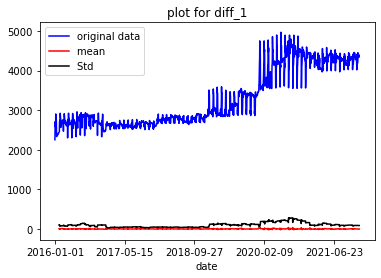

In [11]:
plt.title("plot for diff_1")
g_df['price'].plot(label='original data',color='blue')
g_df["diff_1"].rolling(30).mean().plot(label="mean ",color='red')
g_df["diff_1"].rolling(30).std().plot(label="Std ",color='black')
plt.legend()
plt.show()

In [12]:
# ACF and PACF plots

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
g_df.diff_1.dropna(inplace=True)

In [15]:
g_df.diff_1=g_df.diff_1.dropna()

In [14]:
g_df.diff_1

date
2016-01-01       NaN
2016-01-02    201.90
2016-01-03    253.60
2016-01-04   -130.30
2016-01-05     19.95
               ...  
2021-12-17     -5.40
2021-12-18     -4.90
2021-12-19      0.00
2021-12-20    -35.40
2021-12-21     -7.60
Name: diff_1, Length: 2182, dtype: float64

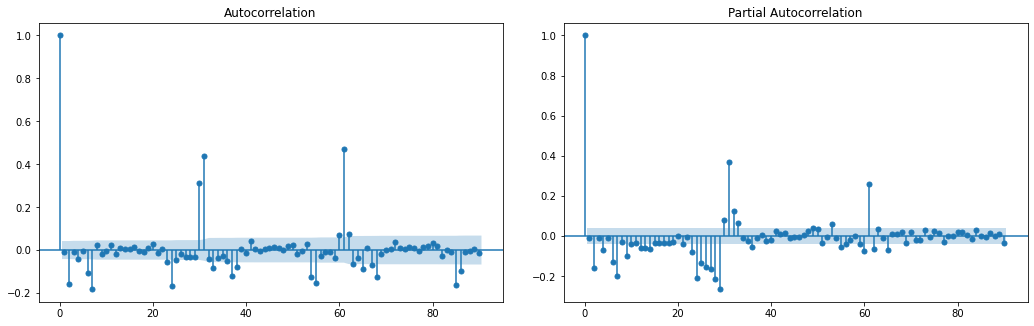

In [15]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=3)
plot_acf(g_df.diff_1[1:],lags=90,ax=ax1)
plot_pacf(g_df.diff_1[1:],lags=90,ax=ax2)
plt.show()

# Model Building :

In [29]:
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
# train test split

In [18]:
g_df["diff_1"]=g_df.diff_1.dropna()

In [19]:
train=g_df.diff_1[1:1722]
test=g_df.diff_1[1722:]

In [38]:
train

date
2016-01-02    201.90
2016-01-03    253.60
2016-01-04   -130.30
2016-01-05     19.95
2016-01-06     19.95
               ...  
2020-09-13    233.10
2020-09-14     34.50
2020-09-15      2.50
2020-09-16      9.90
2020-09-17    -33.90
Name: diff_1, Length: 1721, dtype: float64

### ARIMA :

In [26]:
warnings.filterwarnings("ignore")

In [27]:
for i in range(0,5):
    for j in range(0,5):
        for k in range(0,5):
            try:
                history = [x for x in train]
                predictions = list()
                for t in range(len(test)):
                    model_ARIMA = ARIMA(history, order=(i,k,j)).fit()
                    pred_ARIMA= yhat = model_ARIMA.forecast()[0]
                    predictions.append(yhat)
                    history.append(test[t])
                    
                rmse_ARIMA = sqrt(mean_squared_error(test, predictions))
                print("rmse for p= ",i,",d=",k,", q=",j,"  :  ",rmse_ARIMA)
            except Exception as e :
                        print(e)
                        continue
           

rmse for p=  0 ,d= 0 , q= 0   :   123.9429950155054
rmse for p=  0 ,d= 1 , q= 0   :   176.29834070611986
rmse for p=  0 ,d= 2 , q= 0   :   292.0826676370117
d > 2 is not supported
d > 2 is not supported
rmse for p=  0 ,d= 0 , q= 1   :   124.015636504553
rmse for p=  0 ,d= 1 , q= 1   :   124.05203907930742
rmse for p=  0 ,d= 2 , q= 1   :   176.4068240731342
d > 2 is not supported
d > 2 is not supported
rmse for p=  0 ,d= 0 , q= 2   :   119.94201684951368
rmse for p=  0 ,d= 1 , q= 2   :   124.1279106908579
rmse for p=  0 ,d= 2 , q= 2   :   124.35832582142991
d > 2 is not supported
d > 2 is not supported
rmse for p=  0 ,d= 0 , q= 3   :   119.91080655184577
rmse for p=  0 ,d= 1 , q= 3   :   120.07300680218385
rmse for p=  0 ,d= 2 , q= 3   :   124.16583819273116
d > 2 is not supported
d > 2 is not supported
rmse for p=  0 ,d= 0 , q= 4   :   115.5347088759459
rmse for p=  0 ,d= 1 , q= 4   :   120.08478876108846


KeyboardInterrupt: 

In [ ]:
# Ploting the predictions:

plt.figure(figsize=(15,5))
plt.title("ARIMA model")
plt.xticks(rotation=45)
plt.plot(test.values, color='black',label='Actual Price')
plt.plot(pred_ARIMA.values,color='red', label='Predicted Price')
plt.legend()

In [ ]:
model_ARIMA = ARIMA(rem_ewma_price, order=(0,0,0)).fit()
#pred_ARIMA= model_ARIMA.predict(start=len(train), end=(len(rem_ewma_price)-1))
rmse_ARIMA = sqrt(mean_squared_error(rem_ewma_price, model_ARIMA.fittedvalues))

In [ ]:
rmse_ARIMA

In [ ]:
plt.figure(figsize=(15,5))
plt.title("ARIMA model")
plt.xticks(rotation=45)
plt.subplot(3,1,1)
plt.plot(g_df.price,color='yellow',label='True')
plt.subplot(3,1,2)
plt.plot(rem_ewma_price[0:-1], color='black',label='Actual Price')
plt.subplot(3,1,3)
plt.plot(model_ARIMA.fittedvalues,color='red', label='Predicted Price')
plt.legend()

In [ ]:
# fit model
model = ARIMA(rem_ewma_price, order=(0, 2, 2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)
pred=model_fit.plot_predict(4,2213)
plt.show()

# Auto Arima with Seasonility :

In [29]:
pip install pmdarima

     -------------------------------------- 601.9/601.9 KB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
g_df.shape

(2182, 1)

In [16]:
train=g_df['price'].iloc[0:1745]
test=g_df['price'].iloc[1745:]

In [17]:
# Model upto p=6,q=6

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=0, start_q=0,
                         test='adf',
                         max_p=6, max_q=6, m=30,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[30]             : AIC=inf, Time=3.83 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=21586.183, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=21195.752, Time=2.15 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=21022.807, Time=4.56 sec
 ARIMA(0,1,1)(0,1,0)[30]             : AIC=21241.084, Time=0.63 sec
 ARIMA(0,1,1)(1,1,1)[30]             : AIC=inf, Time=9.91 sec
 ARIMA(0,1,1)(0,1,2)[30]             : AIC=inf, Time=23.98 sec
 ARIMA(0,1,1)(1,1,0)[30]             : AIC=21075.725, Time=2.12 sec
 ARIMA(0,1,1)(1,1,2)[30]             : AIC=inf, Time=38.89 sec
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=20947.754, Time=10.05 sec
 ARIMA(1,1,1)(0,1,0)[30]             : AIC=21229.662, Time=1.23 sec
 ARIMA(1,1,1)(1,1,1)[30]             : AIC=inf, Time=26.18 sec
 ARIMA(1,1,1)(0,1,2)[30]             : AIC=inf, Time=44.74 sec
 ARIMA(1,1,1)(1,1,0)[30]             : AIC=21056.720, Time=4.76 sec
 ARIMA(1,1,1)(1,1,2)[30]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1745
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 30)   Log Likelihood              -10469.877
Date:                            Fri, 29 Apr 2022   AIC                          20947.754
Time:                                    17:26:39   BIC                          20969.541
Sample:                                         0   HQIC                         20955.817
                                           - 1745                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7214      0.013     55.031      0.000       0.696       0.747
ma.L1         -0.9729      0.006   -172.588      0.000      -0.984      -0.962
ma.S.L30      -0.6531      0.008    -79.784      0.000      -0.669      -0.637
sigma2      1.171e+04    153.002     76.530      0.000    1.14e+04     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):             29197.42
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               4.41   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# model itself will pick the best possible values of p,d,q

smodel = pm.auto_arima(train, m=30,seasonal=True,
                          trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=21083.948, Time=18.75 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=21468.986, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=21229.065, Time=3.79 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=21272.173, Time=3.44 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=21467.214, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[30] intercept   : AIC=21131.725, Time=10.74 sec
 ARIMA(2,1,2)(1,0,0)[30] intercept   : AIC=21085.088, Time=18.18 sec
 ARIMA(2,1,2)(2,0,1)[30] intercept   : AIC=21091.409, Time=46.84 sec
 ARIMA(2,1,2)(1,0,2)[30] intercept   : AIC=21091.482, Time=50.24 sec
 ARIMA(2,1,2)(0,0,0)[30] intercept   : AIC=21307.628, Time=0.96 sec
 ARIMA(2,1,2)(0,0,2)[30] intercept   : AIC=21093.867, Time=26.51 sec
 ARIMA(2,1,2)(2,0,0)[30] intercept   : AIC=21083.653, Time=39.99 sec
 ARIMA(1,1,2)(2,0,0)[30] intercept   : AIC=21140.094, Time=18.28 sec
 ARIMA(2,1,1)(2,0,0)[30] intercept   : AIC=21145.654, Time=22.79 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1745
Model:             SARIMAX(4, 1, 1)x(2, 0, [], 30)   Log Likelihood              -10510.969
Date:                             Fri, 29 Apr 2022   AIC                          21039.937
Time:                                     17:47:18   BIC                          21089.113
Sample:                                          0   HQIC                         21058.119
                                            - 1745                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1392      0.071      1.965      0.049       0.000       0.278
ar.L1          0.6496      0.014     48.075      0.000       0.623       0.676
ar.L2          0.0141      0.020      0.703      0.482      -0.025       0.053
ar.L3          0.1873      0.026      7.294      0.000       0.137       0.238
ar.L4         -0.0948      0.021     -4.607      0.000      -0.135      -0.054
ma.L1         -0.9768      0.006   -150.493      0.000      -0.990      -0.964
ar.S.L30       0.4236      0.010     42.852      0.000       0.404       0.443
ar.S.L60       0.0630      0.013      4.982      0.000       0.038       0.088
sigma2      1.001e+04    127.959     78.212      0.000    9757.115    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             31940.78
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.34   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
pred=smodel.predict(n_period=437)

In [22]:
pred

array([4514.69251743, 4462.24023379, 4544.8238576 , ..., 9273.31689891,
       9274.42894862, 9275.54099833])

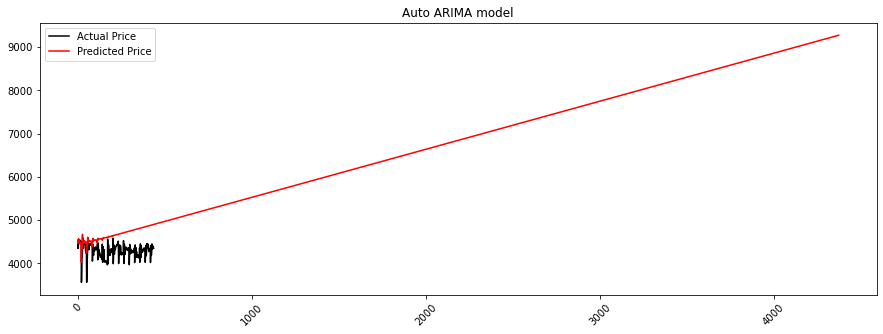

In [21]:
# Ploting the predictions:

plt.figure(figsize=(15,5))
plt.title("Auto ARIMA model")
plt.xticks(rotation=45)
plt.plot(test.values, color='black',label='Actual Price')
plt.plot(pred,color='red', label='Predicted Price')
plt.legend()

# SARIMA : Using SARIMA with the best possible combination found in AutoArima

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
train=g_df['price'].iloc[0:1745]
test=g_df['price'].iloc[1745:]

In [25]:

  
model = SARIMAX(train, 
                order=(4, 1, 1),
                seasonal_order =(2, 0, 0, 30))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               price   No. Observations:                 1745
Model:             SARIMAX(4, 1, 1)x(2, 0, [], 30)   Log Likelihood              -10513.506
Date:                             Fri, 29 Apr 2022   AIC                          21043.013
Time:                                     17:53:28   BIC                          21086.724
Sample:                                 01-01-2016   HQIC                         21059.174
                                      - 10-10-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6459      0.014     46.195      0.000       0.618       0.673
ar.L2          0.0136      0.020      0.675      0.500      -0.026       0.053
ar.L3          0.1868      0.026      7.316      0.000       0.137       0.237
ar.L4         -0.0952      0.020     -4.709      0.000      -0.135      -0.056
ma.L1         -0.9714      0.006   -152.455      0.000      -0.984      -0.959
ar.S.L30       0.4247      0.010     43.139      0.000       0.405       0.444
ar.S.L60       0.0653      0.013      5.196      0.000       0.041       0.090
sigma2      1.004e+04    127.198     78.910      0.000    9787.952    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             32544.92
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.38   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
pred=result.predict(start=len(train), end=len(g_df.price)-1)

In [27]:
pred

2020-10-11    4507.455819
2020-10-12    4450.984613
2020-10-13    4530.656798
2020-10-14    4545.062204
2020-10-15    4535.559870
                 ...     
2021-12-17    4401.543600
2021-12-18    4401.544575
2021-12-19    4401.543459
2021-12-20    4401.542493
2021-12-21    4401.542907
Freq: D, Name: predicted_mean, Length: 437, dtype: float64

In [30]:
rmse=mean_squared_error(test, pred)

In [31]:
rmse

31937.334516615618

In [37]:
pred

2020-10-11    4507.455819
2020-10-12    4450.984613
2020-10-13    4530.656798
2020-10-14    4545.062204
2020-10-15    4535.559870
                 ...     
2021-12-17    4401.543600
2021-12-18    4401.544575
2021-12-19    4401.543459
2021-12-20    4401.542493
2021-12-21    4401.542907
Freq: D, Name: predicted_mean, Length: 437, dtype: float64

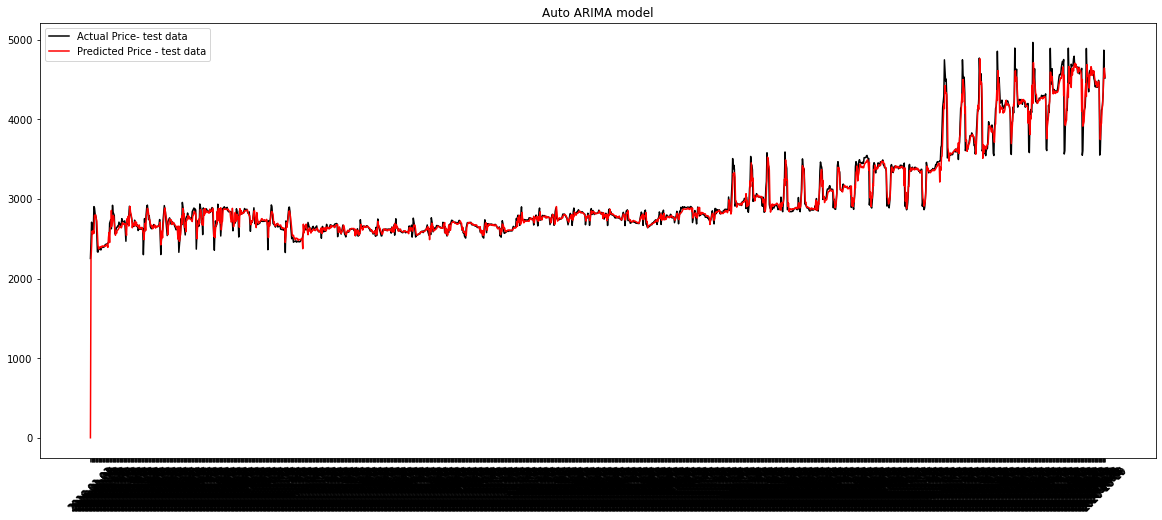

In [48]:
# Ploting the predictions:

plt.figure(figsize=(20,8))
plt.title("Auto ARIMA model")
plt.xticks(rotation=45)
plt.plot(g_df.price[0:1745].values, color='black',label='Actual Price- test data')
plt.plot(result.fittedvalues,color='red', label='Predicted Price - test data')
plt.legend()

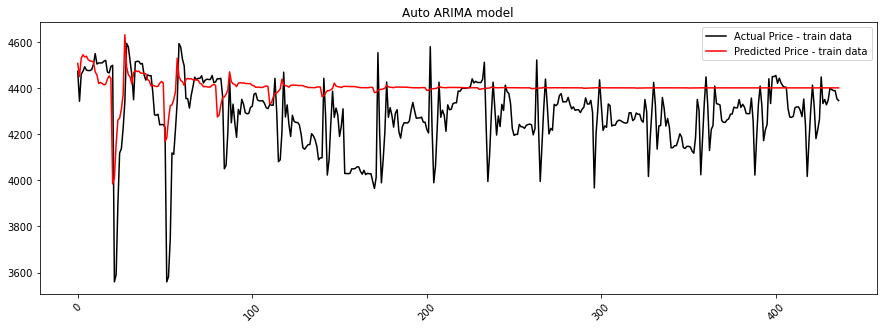

In [49]:
# Ploting the predictions:

plt.figure(figsize=(15,5))
plt.title("Auto ARIMA model")
plt.xticks(rotation=45)
plt.plot(g_df.price[1745:].values, color='black',label='Actual Price - train data')
plt.plot(pred.values,color='red', label='Predicted Price - train data')
plt.legend()